In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d samuelcortinhas/muffin-vs-chihuahua-image-classification

 98% 465M/474M [00:08<00:00, 32.8MB/s]
100% 474M/474M [00:08<00:00, 55.4MB/s]


In [ ]:
from zipfile import ZipFile

with ZipFile('/content/muffin-vs-chihuahua-image-classification.zip','r') as zip:
  zip.extractall('/content')

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [ ]:
train_datagen = tf.keras.preprocessing.image_dataset_from_directory(
                                                '/content/train',
                                                labels="inferred",
                                                label_mode="int",
                                                color_mode="rgb",
                                                batch_size=32,
                                                image_size=(256, 256))
test_datagen = tf.keras.preprocessing.image_dataset_from_directory(
                                                '/content/test',
                                                labels="inferred",
                                                label_mode="int",
                                                color_mode="rgb",
                                                batch_size=32,
                                                image_size=(256, 256))

Found 4733 files belonging to 2 classes.
Found 1184 files belonging to 2 classes.


In [ ]:
def image_processor(image,label):
  image = tf.cast(image/255.,tf.float32)
  return image,label

train_datagen = train_datagen.map(image_processor)
test_datagen = test_datagen.map(image_processor)

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics = ['accuracy']
              )

In [ ]:
history = model.fit(train_datagen,epochs=5,validation_data=test_datagen)

Epoch 1/5
148/148 [==============================] - 833s 6s/step - loss: 0.5812 - accuracy: 0.7338 - val_loss: 0.4037 - val_accuracy: 0.8269
Epoch 2/5
148/148 [==============================] - 841s 6s/step - loss: 0.3884 - accuracy: 0.8293 - val_loss: 0.3322 - val_accuracy: 0.8640
Epoch 3/5
148/148 [==============================] - 804s 5s/step - loss: 0.2822 - accuracy: 0.8821 - val_loss: 0.2788 - val_accuracy: 0.8919
Epoch 4/5
148/148 [==============================] - 822s 6s/step - loss: 0.2074 - accuracy: 0.9195 - val_loss: 0.2902 - val_accuracy: 0.8809
Epoch 5/5
148/148 [==============================] - 831s 6s/step - loss: 0.1364 - accuracy: 0.9501 - val_loss: 0.3088 - val_accuracy: 0.8834


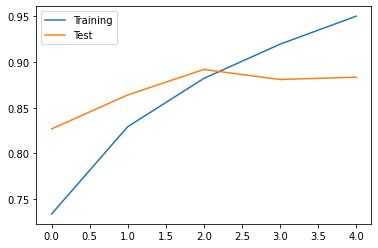

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label="Training")
plt.plot(history.history['val_accuracy'], label="Test")
plt.legend()
plt.show()

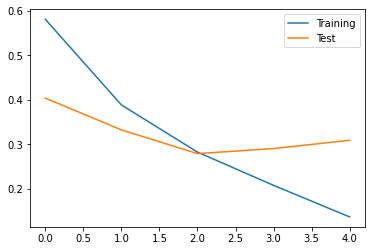

In [ ]:
plt.plot(history.history['loss'],label="Training")
plt.plot(history.history['val_loss'], label="Test")
plt.legend()
plt.show()

In [ ]:
from keras.layers import BatchNormalization,Dropout

In [ ]:
model2 = Sequential()
model2.add(Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2),strides=2))

model2.add(Conv2D(64,(3,3),activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2),strides=2))

model2.add(Conv2D(128,(3,3),activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2),strides=2))

model2.add(Flatten())
model2.add(Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model2.add(Dropout(0.2))
model2.add(Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model2.add(Dropout(0.1))
model2.add(Dense(1,activation='sigmoid'))

In [ ]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics = ['accuracy']
              )

In [ ]:
history2 = model2.fit(train_datagen,epochs=5,validation_data=test_datagen)

Epoch 1/5
148/148 [==============================] - 1075s 7s/step - loss: 15.6906 - accuracy: 0.7222 - val_loss: 18.3068 - val_accuracy: 0.5405
Epoch 2/5
148/148 [==============================] - 1065s 7s/step - loss: 7.0007 - accuracy: 0.7744 - val_loss: 7.8132 - val_accuracy: 0.5405
Epoch 3/5
148/148 [==============================] - 1080s 7s/step - loss: 4.2631 - accuracy: 0.8109 - val_loss: 4.6147 - val_accuracy: 0.6123
Epoch 4/5
148/148 [==============================] - 1069s 7s/step - loss: 3.4927 - accuracy: 0.8274 - val_loss: 3.0234 - val_accuracy: 0.6976
Epoch 5/5
148/148 [==============================] - 1060s 7s/step - loss: 2.6005 - accuracy: 0.8422 - val_loss: 2.2323 - val_accuracy: 0.8539


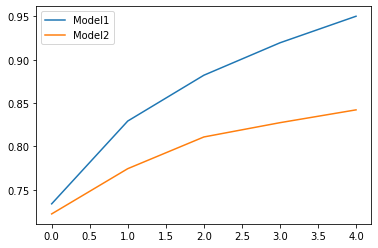

In [ ]:
plt.plot(history.history['accuracy'],label="Model1")
plt.plot(history2.history['accuracy'], label="Model2")
plt.legend()
plt.show()

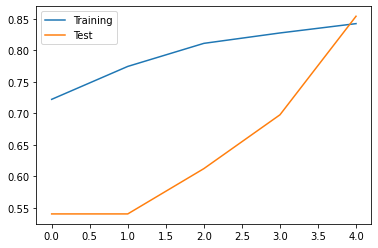

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history2.history['accuracy'],label="Training")
plt.plot(history2.history['val_accuracy'], label="Test")
plt.legend()
plt.show()



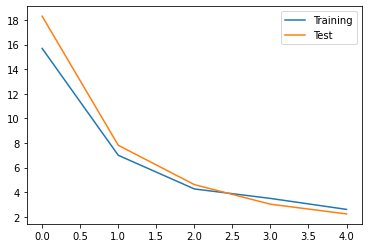

In [ ]:
plt.plot(history2.history['loss'],label="Training")
plt.plot(history2.history['val_loss'], label="Test")
plt.legend()
plt.show()

In [ ]:
model2.save('cvd_model')

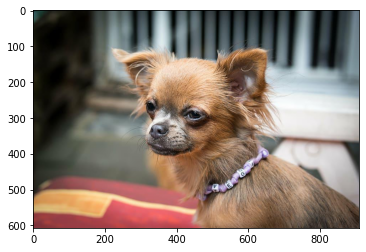

In [ ]:
img = plt.imread('/content/test/chihuahua/img_0_1122.jpg')
plt.imshow(img)
plt.show()


In [ ]:
img.shape

(607, 910, 3)

In [ ]:
import cv2

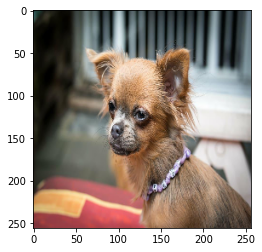

In [ ]:
img = cv2.resize(img,(256,256))
plt.imshow(img)
plt.show()

In [ ]:
img.shape

(256, 256, 3)

In [ ]:
img = img.reshape(1,256,256,3)

In [ ]:
model2.predict(img)

1/1 [==============================] - 0s 119ms/step


array([[0.]], dtype=float32)

In [ ]:
import cv2

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = '/content/test/chihuahua/img_0_1082.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 1s 1s/step
Predicted: [('n02085620', 'Chihuahua', 0.8238161), ('n02087046', 'toy_terrier', 0.11606135), ('n02107312', 'miniature_pinscher', 0.041233804)]


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

model = VGG16(weights='imagenet')

img_path = '/content/test/chihuahua/img_0_1082.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 1s 741ms/step
Predicted: [('n02085620', 'Chihuahua', 0.72476673), ('n02087046', 'toy_terrier', 0.09703562), ('n02107312', 'miniature_pinscher', 0.091519244)]
